![image](JMUlogo.png)   

> # Math 248 Fall 2021
>                                                      
> # Computers and Numerical Algorithms                                                                                                     
> ## Instructor: Hala Nelson

# Week 4 Notes 
## Topic: Sequences $\{a_n\}_{n=1}^\infty$ and Series $\sum_{n=1}^\infty a_n$ of Numbers

- Sequence of partial sums $\{s_n\}_{n=1}^\infty$ associated with the series $\sum_{n=1}^\infty a_n$: $s_n=a_1+a_2+\dots+a_n$ and $\sum_{n=1}^\infty a_n=\lim_{n\to\infty}s_n$.
- Does the series converge or diverge? Why? (Calculus II review, for example $p$-series and alternating series test).
- **p-series:** $\sum_{n=1}^\infty\frac{1}{n^p}$ converges for $p>1$ and diverges otherwise. Check [this link for p-series](http://www.math.drexel.edu/~tolya/p_series.pdf).
- If $\sum_{n=1}^\infty a_n=\infty$, how fast does it blow up (how many terms of the series do we need to add up in order to exceed a certain number)? 

### Divergent series $\sum_{n=1}^\infty a_n=\infty$ and how fast the divergence happens: 
- The series $\sum_{n=1}^\infty 1$ blows up like the sequence $n$. 

- The harmonic series $\sum_{n=1}^\infty \frac{1}{n}$ blows up like $\ln n$ (very slowly, which makes sense considering that $$\sum_{n=1}^N \frac{1}{n}=1+\frac{1}{2}+\frac{1}{3}+\dots+\frac{1}{N}<\sum_{n=1}^N1=1+1+1+\dots+1,$$ and this last series grows like $N$. Recall that $\ln x$ grows slower than any polynomial, including the polynomial $x$. 
- To prove that the harmonic series $\sum_{n=1}^\infty\frac{1}{n}$ diverges *like* $\ln n$, we can use an integral bound, available from advanced calculus classes. Since $a_n=\frac{1}{n}$ is positive and decreasing to zero, we have: $$a_n\le s_n-\int_1^n a(x)dx\le a_1.$$ This will give $s_n=\ln n+C_n$, where $0\le C_n\le 1$ (and $C_n\to C$ as $n\to\infty$).

## If the series converges $\sum_{n=1}^\infty a_n=L$ we have two questions: 

a) What is the limit $L$? [This page has a bunch of series limits](https://en.wikipedia.org/wiki/List_of_mathematical_series). 

b) How fast does it get approached (how many terms do you have to add up in the series to get to within a certain small distance from the limit (say $10^{-6}$)? You need to find the first $n$ that satisfies: $|s_n-L|<10^{-6}$.

**Answers:** 
1. There are a lot of techniques to find the sum of a series analytically: 
- Taylor series expansions of famous functions, (for example, $e^x, \ln(1+x), \cos x, \sin x, \frac{1}{1+x}$, Bessel functions, special functions, etc.). 
- Fourier series techniques.
- Contour integration from complex analysis. 
- Analytically finding a formula for $s_n$ in terms of $n$ then taking the limit as $n\to\infty$.

2. There are formulas and theorems that estimate (give upper and lower bounds) the partial sum $\{s_n\}$ in terms of $n$: 
- For example, for a series $\sum_{n=1}^\infty (-1)^na_n$ that passes the alternating series test, we have $$|s_n-L|<|a_{n+1}|.$$ So $\sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}=\ln(2)$ needs about $500,000$ to get to within $10^{-6}$ from the limit, while $\sum_{n=0}^\infty \frac{(-1)^n}{n!}=e^{-1}$ needs only $8$ terms to get the same accuracy. So the former series converges much slower ($\sim \frac{1}{n+1}$) than the latter ($\sim \frac{1}{(n+1)!}$).

### Speed of convergence of a series $\sum_{n=1}^\infty a_n=L$ and error analysis (numerical and analytical error analysis)

1. **Idea:** It's usually hard to compute an explicit formula for $s_n=a_1+a_2+\dots+a_n$ in terms of $n$, but it's easier to bound $s_n$ and hence gain a lot of information about its behavior. So we say $s_n\to L$ *like* $f(n)\to 0$ when $|s_n-L|<Cf(n)$ where $C$ is independent of $n$ and $f(n)$ is a sequence converging to zero (ideally, we have a lot of information about $f(n)$ so we know how to deal with it, for example $\frac{1}{n^\alpha}, \frac{1}{n\ln n}, etc.$).

2. **The error $\epsilon_n=|s_n-L|$** is the absolute value of the *tail of the series* ($\sum_{k=n+1}^\infty a_k$). It gives the distance between the *infinite sum* (which is equal to $L$) and its *finite approximation* $s_n$. This error will decrease as $n$ increases, since the more terms you add from the series, the closer $s_n$ will get to $L$. Hence $\epsilon_n$ is a sequence that converges to zero. The question is, how fast does this happen, or in other words, how many terms do you need to add from the series to get approximate the limit up to a certain level of accuracy?

3. **Two analytical error bounds:**

- **Special Alternating Series:** This works only for alternating series $\sum_{k=1}^\infty (-1)^ka_k$ that pass the alternating series test:
$$\epsilon_n=|s_n-L|<|a_{n+1}|$$
- **Special Positive Series:** $\sum_{n=1}^\infty a_n$ whose terms are positive (so not alternating) and eventually decreasing:
$$\int_{n+1}^\infty a(x)dx\le L-s_n\le\int_n^\infty a(x)dx$$

4. Knowing the limit $L$ is not necessary to get the error bound (meaning we can still estimate the error without necessarily knowing the value of the limit).

5. If no analytical error bound is available, we can *test* some famous forms of bounds *numerically*: $\frac{1}{n^\alpha}, \frac{1}{n^\alpha(\ln n)^\beta}, \frac{1}{(\ln n)^\beta}, \frac{1}{b^{n^\alpha}}, etc.$ That is, we can try to numerically *fit* the graph of the sequence $\epsilon_n$ to one of the above *test sequences*.

6. The graph of an error that behaves like a power law (that is, $\epsilon_n\sim\frac{1}{n^\alpha}$) will be a straight line in a $\log$-$\log$ plot. The slope of the straight line will give the value of $\alpha$. 

7. How can we analyze $\epsilon_n=|s_n-L|$ numerically if we do not have the analytical value of the limit $L$? You can always consider the difference between consecutive terms $g_n=|s_n-s_{n+1}|$. This sequence will also decrease to $0$ as $n$ increases. In fact $g_n=|s_n-s_{n+1}|\le\epsilon_n+\epsilon_{n+1}$ (insert $+L$ and $-L$ then use the triangle inequality). Careful that this only provides a lower bound for $\epsilon_n$.

8. In the numerical analysis literature, there are terms like *rate of convergence* and *order of convergence*, which again give a measure of how fast a sequence or series approaches its limit.
___
# Practice Exercises for Weeks 3 and 4
1. Fibonacci Numbers:
- What are Fibonacci numbers?
- Give examples supporting the statement *Fibonacci numbers are abundant in nature*. 
- Write a program that outputs a vector containing the first 40 Fibonacci numbers $$F_{n+2}=F_n+F_{n+1}, F_1=0, F_2=1.$$
- What is the Golden ratio?
- What's the relationship between the Golden Ratio and Fibonacci numbers.
- Write a program that outputs a sequence converging to the Golden Ratio.
- Is there an explicit formula for the Fibonacci sequence? ($a_n=f(n)$)

2. The $p$-series with $p=4$ is given by $\sum_{n=1}^\infty\frac{1}{n^4}$. It converges because $p>1$ and its exact sum is $\frac{\pi^4}{90}$.
- Write a program that outputs how far you have to go in the series in order to approximate $\frac{\pi^4}{90}$ to within $10^{-8}$. 
- Show analytically that the convergence is like $n^{-\alpha}$ and find $\alpha$ (hint: Prove your result using an integral error bound).
- Show numerically that the convergence is like $n^{-\alpha}$ and find $\alpha$ (hint: Numerically calculate the error vector $\epsilon_n$, and plot it. Then make a $log$-$log$ plot, and if that's a straight line, then $\epsilon_n\sim n^\alpha$, where $\alpha$ is the slope of the line. You estimate the slope numerically by fitting the graph into a straight line.)
- Use the analytical result in (b) to answer part (a) and check whether it matches with your numerical answer.

3. Consider the series $\sum_{n=1}^\infty\frac{1}{n^2}$
- Write a program that studies the convergence of the following series $\sum_{n=1}^\infty\frac{1}{n^2}$ to its limit. What is the value of this limit ($\frac{\pi^2}{6}$)? Make a graph demonstrating the convergence of the sequence of partial sums to this limit.
- Show numerically that the convergence is like $n^{-\alpha}$ and find $\alpha$. (Hint: Numerically calculate the error vector $\epsilon_n$, and plot it. Then make a $log$-$log$ plot, and if that's a straight line, then $\epsilon_n\sim n^\alpha$, where $\alpha$ is the slope of the line. You estimate the slope numerically by fitting the graph into a straight line.)
- Prove analytically that the convergence is like $n^{-\alpha}$ and find $\alpha$ (hint: Prove your result using an integral error bound).

4. Prove analytically that the series $\sum_{n=1}^\infty\frac{1}{n^6}=\frac{\pi^6}{945}$ converges like a power law and find the power (hint: use an integral error bound.) Programming: Verify your result numerically.

5. Alternating series: Decide how many terms of the series $\sum_{n=1}^\infty \frac{(-1)^{n+1}}{\sqrt{n}}$ will have to be used to be sure the estimate to the sum is accurate to within $0.005$.

6. Alternating series: Compute analytically how many terms you would need to use to calculate $\sum_{n=1}^\infty\frac{(-1)^{n+1}}{n^2}$ to within $0.0005$ accuracy. Do you know the limit of this series? Does this series converge like a power law, or some other law? If yes, what is the power? 

7. Given that: $\sum_{k=0}^\infty k^3\frac{z^k}{k!}=(z+3z^2+z^3)e^z$
- Prove the above formula using $e^z=\sum_{k=0}^\infty \frac{z^k}{k!}$. (Hint: Every time you differentiate the series with respect to $z$ you get a new multiplication by $k$. So you'd expect to differentiate three times to get $k^3$, but be careful and adjust the power of $z$.)
- Study the convergence of $\sum_{k=0}^\infty \frac{(-1)^kk^3}{k!}$: find its limit, and estimate analytically how many terms of the series you need to add in order to approach the limit to within $10^{-8}$. 
- Write a program that verifies your analytical result from part (b).
___

> # Examples in Class
___

# 1. How many terms of the harmonic series $\sum_{n=1}^\infty\frac{1}{n}$ do we have to add up in order to exceed the number $10$. Note that since this series blows up to $+\infty$, it will definitely exceed $10$.

In [1]:
# sum=1/1+1/2+1/3+.....
n=1
sum=1 
while sum<10:
    n +=1
    sum +=1/n

print('n+1=',n+1)
print('sum=',sum)
print(f"""Even though this series diverges, it does so incredibly slowly that you have to add up 
    {n+1} terms in order to exceed 10""")

n+1= 12368
sum= 10.000043008275778
Even though this series diverges, it does so incredibly slowly that you have to add up 
    12368 terms in order to exceed 10


# 2. How many terms do we have to add up from the convergent series $$\sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}$$ to approach its limit $\ln (2)$ to within $10^{-6}$?

In [6]:
import numpy as np
def a(n):
    return (-1)**(n-1)/n
n=1
L=np.log(2)
sum=a(1)
while abs(sum-L)>0.000001:
    n +=1
    sum =sum +a(n)
    if n>1000000:
        raise Exception("The series has not converged yet, check your limit")
        break

print(f"The partial sum after adding {n} terms of the series is {sum}")
print("The analytical limit is",L)
print("The difference between the partial sum and the limit is",abs(sum-L))

The partial sum after adding 500000 terms of the series is 0.6931461805610046
The analytical limit is 0.6931471805599453
The difference between the partial sum and the limit is 9.999989406539456e-07


# 3. Consider the alternating series $$\sum_{n=0}^\infty\frac{(-1)^n}{n!}$$ 
1. Does it converge or diverge?
2. Use a famous Taylor series to prove that the limit is $L=e^{-1}$.
3. Write a program that computes how many terms you need to add up from this series to approach the limit to within $10^{-6}$. 
4. Comment on the speed of converegence of this series compared to the above series.
5. Use the error bound for the alternating series that passes the alternating series test to find analytically the number of terms you have to add to approach the limit to within $10^{-6}$

In [3]:
def a(n):
    return (-1)**(n)/np.math.factorial(n)
n=0
L=np.exp(-1)
sum=a(0)
while abs(sum-L)>0.000001:
    n +=1
    sum =sum +a(n)
    if n>1000000:
        print('The series has not converged yet')
        break

print(f"The partial sum after adding {n} terms of the series is {sum}")
print("The analytical limit is",L)
print("The difference between the partial sum and the limit is",abs(sum-L))

The partial sum after adding 9 terms of the series is 0.3678791887125221
The analytical limit is 0.36787944117144233
The difference between the partial sum and the limit is 2.5245892021352745e-07


# 4. Let's define the error sequence $\epsilon_n=|s_n-L|$ for $\sum_{n=0}^\infty\frac{(-1)^n}{n!}$ and plot it.
We will save the error $|s_n-L|$ at each step in a list, then we will plot that list and see what function that converges to zero fits the graph of that error.

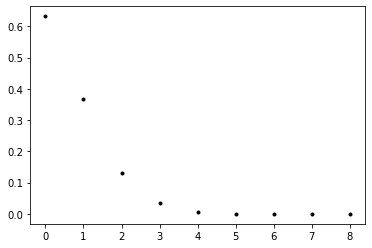

In [4]:
def a(n):
    return (-1)**(n)/np.math.factorial(n)
n=0
L=np.exp(-1)
sum=a(0)
# initiate an empty list for the error 
error=[]
while abs(sum-L)>0.000001:
    error.append(abs(sum-L))
    n +=1
    sum =sum +a(n)
    if n>100000:
        print('The series has not converged yet')
        break
        
        
import matplotlib.pyplot as plt
plt.plot(error,'k.')

# 5. Let's define the error sequence $\epsilon_n=|s_n-L|$ for $\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n}$ and plot it. Then we will discover whether it is a power law or not using a log-log plot. 

Equation of fitted line is y=-0.9999193764530026x+-0.6941382883012268
The error sequence converges to zero like a power law n^-0.9999193764530026


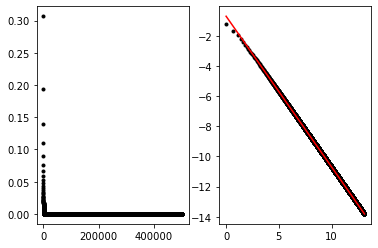

In [5]:
def a(n):
    return (-1)**(n-1)/n
n=1
L=np.log(2)
sum=a(1)
# initiate an empty list for the error 
error=[]
while abs(sum-L)>0.000001:
    error.append(abs(sum-L))
    n +=1
    sum =sum +a(n)
    if n>1000000:
        print('The series has not converged yet')
        break
        
# let's make an error plot then a log-log plot for the error
N=range(1,n)        
fig, (first, second) = plt.subplots(1, 2)
first.plot(error,'k.')
second.plot(np.log(N),np.log(error),'k.')

# Let's fit a line for through second plot (the second plot looks like a line so the error is a power law)
m, b = np.polyfit(np.log(N),np.log(error),1)
print(f"Equation of fitted line is y={m}x+{b}")
second.plot(np.log(N),m*np.log(N)+b,'r')
print(f"The error sequence converges to zero like a power law n^{m}")